# Importing all the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# warnings- It is to ignore the warning
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


# Import the Dataset
Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [ ]:
df = pd.read_csv(" https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


# Problem Statement:
In this data we have one independent variable temperature and one dependent variable 'Revenue'. You have to build a DecisionTreeRegressor to study the relationship b/w the two varibles and then predict the revenue for the ice cream shop based on the temperature of particular day.

# EDA - Exploratory Data Analysis

In [ ]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


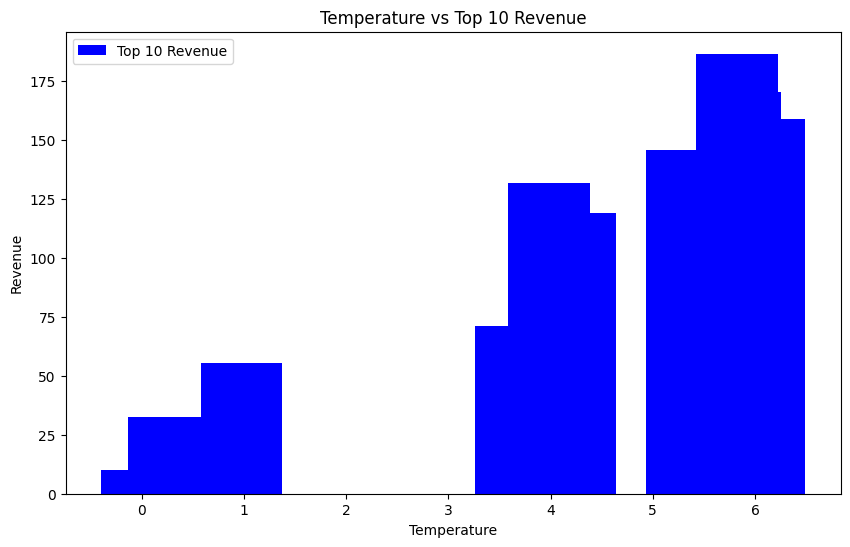

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort DataFrame by revenue in descending order and take the top 10
top_10_revenue = df.sort_values(by='Revenue', ascending=True).head(10)

# Plotting the graph as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_revenue['Temperature'], top_10_revenue['Revenue'], color='blue', label='Top 10 Revenue')
plt.title('Temperature vs Top 10 Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

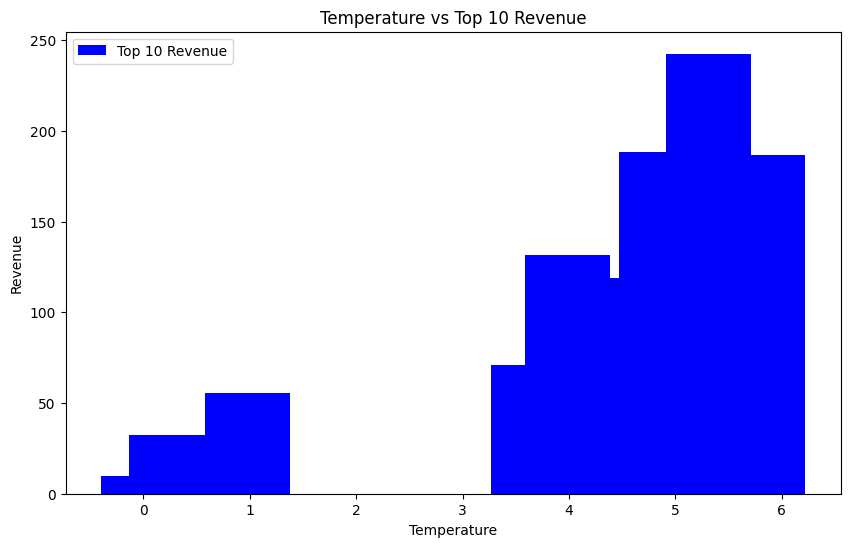

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort DataFrame by revenue in descending order and take the top 10
top_10_revenue = df.sort_values(by='Temperature', ascending=True).head(10)

# Plotting the graph as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_revenue['Temperature'], top_10_revenue['Revenue'], color='blue', label='Top 10 Revenue')
plt.title('Temperature vs Top 10 Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Find the row with the maximum revenue
max_revenue_row = df[df['Revenue'] == df['Revenue'].max()]

# Extract the temperature from the row
temperature_with_highest_revenue = max_revenue_row['Temperature'].values[0]

print(f'Temperature with highest revenue: {temperature_with_highest_revenue}°C')

Temperature with highest revenue: 45.0°C


In [ ]:
import pandas as pd

# Find the row with the minimum revenue
min_revenue_row = df[df['Revenue'] == df['Revenue'].min()]
temperature_with_lowest_revenue = min_revenue_row['Temperature'].values[0]
print(f'Temperature with lowest revenue: {temperature_with_lowest_revenue}°C')


Temperature with lowest revenue: 0.0°C


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature v/s Revenue')

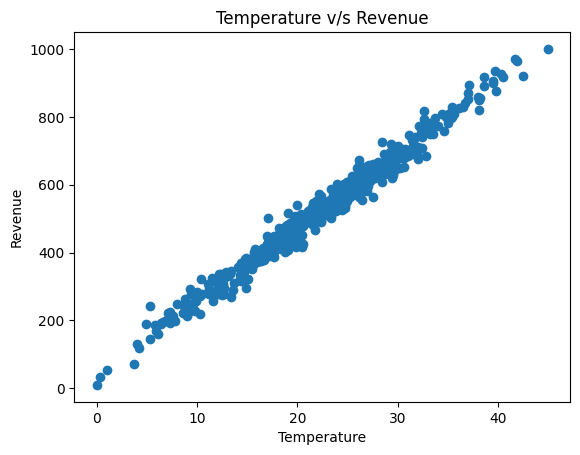

In [ ]:
plt.scatter(df.Temperature,df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature v/s Revenue')

Conclusion: As the temperature increses ,revenue also increases. It shows the linear increase.
There is a strong positive correlation.

Heatmap: To find out the correlation in terms of visualization we use heatmap
annot- > it is to represent value in the color region
cmap-> It represents the color followed in the heat region

<Axes: >

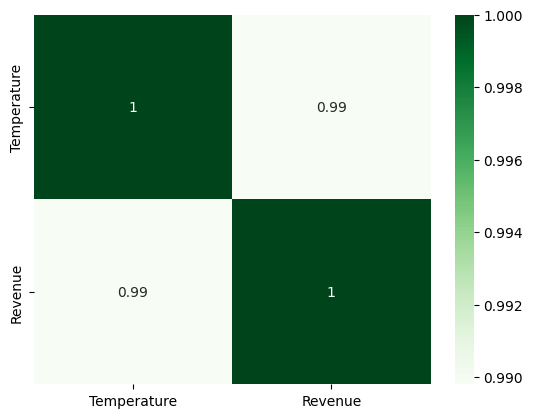

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='Greens')

Conclusion: It shows that there is a strong positive correlation which is nearly approx. 1 i.e, 0.99

# Finding out the Outliers
By plotting the boxplot

<Axes: >

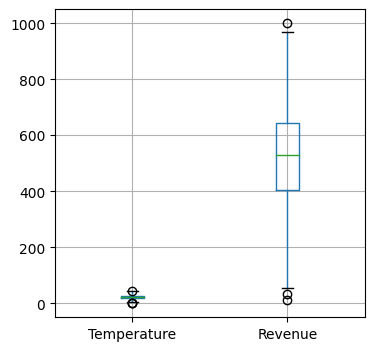

In [ ]:
plt.figure(figsize=(4,4))
df.boxplot()

Box plot tells us 2 thing:
1. About the Outliers
2. Where the maximum data lies.
3. Quartile ranges

Conclusion: There are 3 outliers in Revenue and only 2 outliers in   Temperature this is b'coz there is strong positive correlation.

# Splitting of data- Training set and testing set

In [ ]:
x= np.array(df.Temperature.values)
y = np.array(df.Revenue.values)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train)

400

In [ ]:
len(x_test)

100

In [ ]:
len(y_train)

400

In [ ]:
len(y_test)

100

# choosing the model

In [ ]:
regressor = DecisionTreeRegressor()

# Training the model

In [ ]:
regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

DecisionTreeRegressor()

# Testing the model

In [ ]:
y_pred = regressor.predict(x_test.reshape(-1,1))

# Compare the y_test with y_pred

In [ ]:
comp = pd.DataFrame({"Actual Values":y_test.reshape(-1),"Predicted Values":y_pred.reshape(-1)})

In [ ]:
comp

,Actual Values,Predicted Values
0,384.699415,296.906532
1,459.735350,463.065614
2,746.946389,697.833986
3,565.875000,569.618756
4,702.901717,651.861536
...,...,...
95,295.339699,319.349462
96,594.311675,572.672047
97,521.267379,507.900282
98,440.677829,441.002944


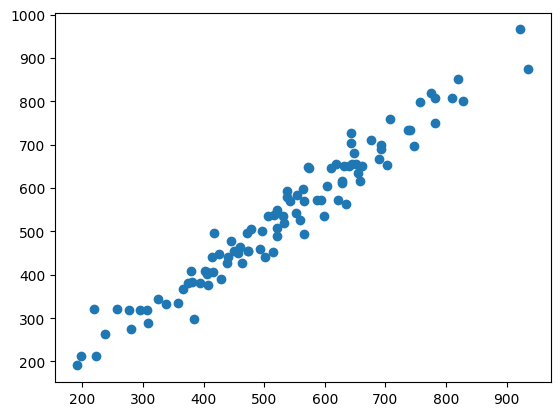

In [ ]:
plt.scatter(y_test,y_pred)

Text(0.5, 1.0, 'x_test v/s y_pred')

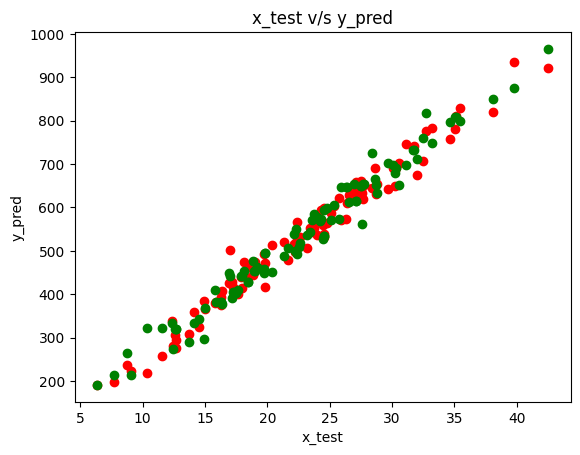

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.xlabel('x_test')
plt.ylabel('y_pred')
plt.title('x_test v/s y_pred')

<Axes: >

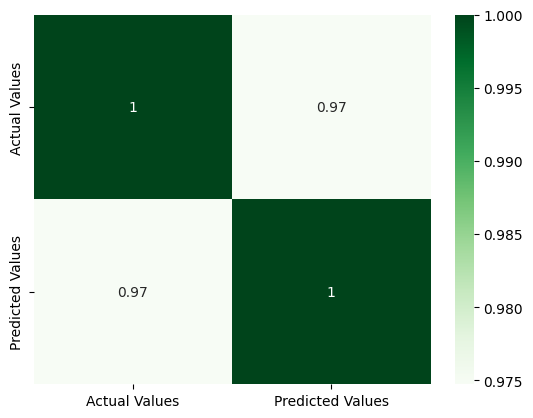

In [ ]:
sns.heatmap(comp.corr(),annot=True, cmap='Greens')

Conclusion: Strong positive correlation

<Axes: >

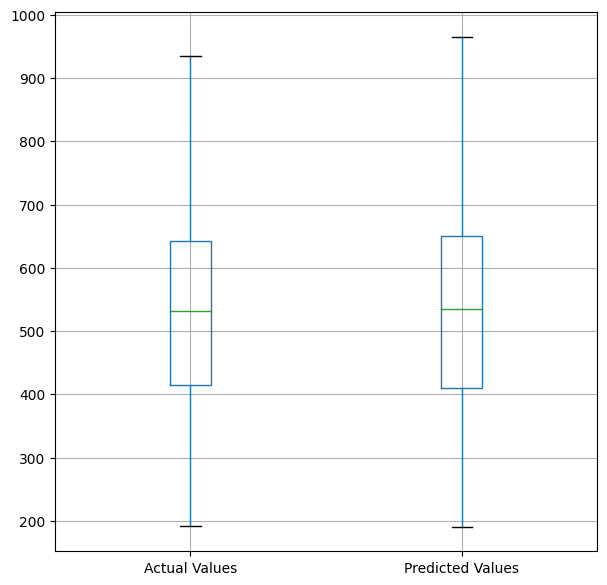

In [ ]:
plt.figure(figsize=(7,7))
comp.boxplot()

Mean Squared Error (MSE) is a commonly used metric in statistics and machine learning to measure the average squared difference between the actual (observed) values and the predicted values. It provides a way to quantify the accuracy of a prediction or an estimator.
MSE has the drawback of being sensitive to outliers since it squares the differences.

# Performance

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
r2_score(y_test,y_pred)

0.9489740617348863

Conclusion: We can say that the model is good model with the accuracy of 94%

In [ ]:
mean_squared_error(y_test,y_pred)

1596.7675398671072

In [ ]:
mean_absolute_error(y_test,y_pred)

29.64951224899999

In [ ]:
#Using Support Vector
from sklearn.svm import SVR
model1 = SVR()
model1.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

y_pred = model1.predict(x_test)
from sklearn.metrics import r2_score
print("Acc=",r2_score(y_test,y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.90029326 26.94363797  9.65149525 19.72133149 19.19495126 34.67804648
 20.01638438 15.99234716 23.59102806 17.58837197 23.24671713 19.77936855
 22.15258869 14.6859445  28.99373705 14.36142415 35.44454622 36.99708394
 16.30012497 15.52116187 22.38760374 18.77535808 27.99922248 31.57998903
 22.63297707 12.70471774 26.87358624 18.77353222 26.16885914 31.66946458
 26.87495294 27.32232277 11.18775682 19.75470829 35.09479555 12.44265041
 34.86070051 13.30179635 23.34903419 16.02097541 25.99599345 27.93134811
  6.09389721 32.71638067 16.40602096 31.22898848 29.3050392   6.35245937
 23.08766377 26.9567197  25.05628082 16.99788893 28.64919191 19.20297003
 22.52674945 17.6568394   0.2670277  24.81875357  6.5425144  15.11819661
 25.45783637 22.22512228 32.33480808 23.42464718 25.54596553  8.99176011
 17.09064457 22.6785601  20.12955049 21.75209218 22.31107869 18.97799114
  8.79095281 19.2786717  24.96044566 34.47216919 23.9638795  27.28106383
 29.50819457 27.37540101 21.6018917  10.09664458 29.20971484 25.42216523
 10.32638937  4.23646497 27.72143999 35.33120818 27.51664567 27.31281141
 30.66659556 25.55120003 19.11365281 29.18504465 22.17119887 30.96508651
 39.76412854 26.12213765 34.0616734  22.27489926 18.46290678 18.77682968
 18.70847606 10.24505765 21.35802411 20.89871624 17.26218112 16.55584289
 14.93150577 18.98527518 32.10707989  9.55727588 29.25112258 20.97115284
  7.56112494 21.77594799  7.10749101 14.73955066 19.05928653 32.46497067
 11.50349764 24.94971519 16.70385182 21.90251935 15.67648661 11.45525338
 39.8593964  28.78743552 28.95773632 16.25872074 26.19166817 28.46493296
 12.4508333  13.62450892 18.50623116 12.46293731 33.31499762 29.76822349
 21.71200518 28.54798741 32.40924246 29.43057848 22.00987431 18.97830025
 25.33342015 16.14582413 26.85972289  9.40347921 30.42779184 18.34681936
 30.56266124 25.8659433  29.7185162  30.33033167 27.79055388 17.63693676
 11.07784312 26.96421749 20.26501213 13.70777988 29.4637861  27.78049953
 17.65850231 14.37969698 14.2635406   9.81251047  8.63807589 15.6614643
 22.36240237 24.56688442 11.13270573  5.30750735 21.54045905 12.20968364
 37.12707034 37.99863474 28.82975908 25.22777375 12.08460133 21.70395288
 22.94031709 25.11606991 21.61064376  5.82233235 23.05621357 16.30255473
 24.52184673 20.47502254 19.49474317 17.69003162 33.23567229 17.18894776
 37.05754246 28.90019172 27.5990664  21.00704512 18.88035599 11.17715183
 30.45673953 33.55141872 19.81463838 13.36431317 20.59533505 18.14895234
 19.61787546 24.10161613 20.56301483 26.9236056  28.4917635   0.97686999
 27.57296049 45.         26.4560508  24.34910395 33.7442087  22.87056201
 18.55163953 18.50836039 14.55121221 24.5288527  35.03345633 20.55667911
 24.98851899 30.22810362 25.925171   16.19129752 25.11206572 22.39797728
 40.47398918 18.88716165 10.40342267 36.11656147  0.         39.53990899
 27.06860738 39.5131548  23.15300185 25.49662411 21.67989703 25.24114819
 29.70702382 26.36052065 38.62886243 11.5951027   9.78238075 26.12624136
 21.89743267 12.18941793 25.42294716 27.88711086 19.62265889 13.33060576
 36.56911506 20.15334527 24.48490862 28.63373276 27.54196095 15.10292191
 35.4581362  32.89309211 14.28719594 31.16003022 14.86610347 18.48314099
 30.83398474 19.98286779 33.25089892 18.43998163 25.44824    23.88172478
 32.64993621 12.35208102 36.70257212 19.17204498  5.33841267 24.30829573
 20.22642046  8.75600403 24.11359659 12.57151377 17.29920384 23.0034888
 15.91667782 19.81753939 14.10966102 23.98464085 20.47359412 17.51707397
 35.35976059 20.90057478 27.11773949 11.69453767  5.85845428 25.00237968
 24.58590837 18.23322784 28.2717647  23.07061587 23.41086133 38.66820248
 22.11870569 26.9441229  24.24037247 17.19943002 20.24414985 13.11245224
 22.44803391 24.61523866 17.99701481 35.62892497 31.8914678  12.58815695
  8.03315296 18.81182403 18.90848865 28.04640445 22.84197048 41.92444647
 12.06247527 28.72991474 38.09660871 26.00519115 23.49753209  9.01886024
 30.02820743 30.6353071   3.98652317 35.21724007  6.39383463 22.63473505
 10.11973687 19.06659113 19.97746731 32.80503252 31.7379196  24.76187643
 15.21456942 26.36974685 28.33536277 23.40725697 28.70127646 21.28191601
  8.75555394 22.24873896 29.58948056 12.90177331 23.57711325 29.31201255
 28.86558895 42.51528041 18.15921677 18.63391286 26.07840506 30.08108934
 24.80257679 21.32239237  4.86587362 11.05909651 24.18393726 16.36494499
  8.79430294 20.24734584 29.70418303 12.12301401 26.18796989 26.25074588
 10.4471261  27.18851714 18.57811922 24.24311263 19.36315346 27.12812867
 30.76273994 20.41103121 15.04792332 18.88371892 23.97593152 30.08518963
 38.14633277  9.3093456  23.95931178 23.82492237 29.12912778 24.77819856
 17.87119907 11.56964367 33.51453981 21.12912561 15.02911176 25.37410906
 31.41262876 41.76658912 19.26778542 31.03033279 22.18951589 17.04973761
 14.3840835  31.47122432 16.95477783 26.53021877].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

y_pred = model1.predict(x_test.reshape(-1,1))
from sklearn.metrics import r2_score
print("Acc=",r2_score(y_test.reshape(-1,1),y_pred.reshape(-1,1)))

Acc= 0.952731994920273


In [ ]:
#Using the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
print("Acc=",r2_score(y_test,y_pred))

Acc= 0.9808133007718761


In [ ]:
# using the Linear Regressor
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train,y_train)

y_pred = model2.predict(x_test)
from sklearn.metrics import r2_score
print("Acc=",r2_score(y_test,y_pred))

Acc= 0.9824395418111403


In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest Regressor', 'Support Vector Regressor' ,'Decision Tree Regressor'],
    'Acc_Score': [0.9824,0.9808,0.4892,0.9489]})

result_df = results.sort_values(by='Acc_Score', ascending=False)
result_df = result_df.set_index('Acc_Score')
result_df

,Model
Acc_Score,
0.9824,Linear Regression
0.9808,Random Forest Regressor
0.9489,Decision Tree Regressor
0.4892,Support Vector Regressor
